In [1]:
import requests
from bs4 import BeautifulSoup
for i in range(1, 11):
    url = "https://www.flipkart.com/search?q=mobile+phones+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=" + str(i)
    r = requests.get(url)
    print(r)
    print(url)
import pandas as pd 
import requests
from bs4 import BeautifulSoup
url = "https://www.flipkart.com/search?q=mobile+phones+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1"
product_name=[]
prices=[]
description=[]
reviews=[]
r= requests.get(url)
#nt(r)
soup = BeautifulSoup(r.text,"lxml")
box=soup.find("div",class_="DOjaWF gdgoEp")
names = box.find_all("div",class_="KzDlHZ")
print(names)                      
import pandas as pd 
import requests
from bs4 import BeautifulSoup

url = "https://www.flipkart.com/search?q=mobile+phones+under+50000&page=1"
product_name = []
prices = []
description = []
reviews = []

r = requests.get(url)
soup = BeautifulSoup(r.text, "lxml")
names = box.find_all("div", class_="KzDlHZ")

for i in names:
    name = i.text.strip()
    product_name.append(name)
print("PRODUCT NAME:",product_name)
prices = box.find_all("div", class_="Nx9bqj _4b5DiR")
price_list = []  
for i in prices:
    name = i.text.strip()
    price_list.append(name)
print("LIST OF PRODUCT PRICE:",price_list)
desc = box.find_all("ul",class_="G4BRas")
for i in desc:
    name=i.text
    description.append(name)
    print("PRODUCT DESCRIPTION:",description)
reviews = box.find_all("div", class_="XQDdHH")
review_list = []
for i in reviews:
    name = i.text.strip()
    review_list.append(name)
#print("LIST OF REVIEWS:",review_list)
print("LIST OF REVIEWS:",review_list)
for i in range(2,13):
    df=pd.DataFrame({"PRODUCTS":product_name,"PRICES":price_list,"DESCRIPTION":description ,"REVIEW":review_list})
print(df)


<Response [200]>
https://www.flipkart.com/search?q=mobile+phones+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
<Response [200]>
https://www.flipkart.com/search?q=mobile+phones+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
<Response [200]>
https://www.flipkart.com/search?q=mobile+phones+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
<Response [200]>
https://www.flipkart.com/search?q=mobile+phones+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
<Response [200]>
https://www.flipkart.com/search?q=mobile+phones+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
<Response [200]>
https://www.flipkart.com/search?q=mobile+phones+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
<Response [200]>
https://www.flipkart.com/search?q=mobile+phones

In [3]:
df.to_csv("flipkart_mobiles.csv", index=False)
#DATA CLEANING
df["PRICES"] = df["PRICES"].str.replace("₹", "").str.replace(",", "")
df["PRICES"] = df["PRICES"].astype(int)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.to_csv("flipkart_mobiles_cleaned.csv", index=False)


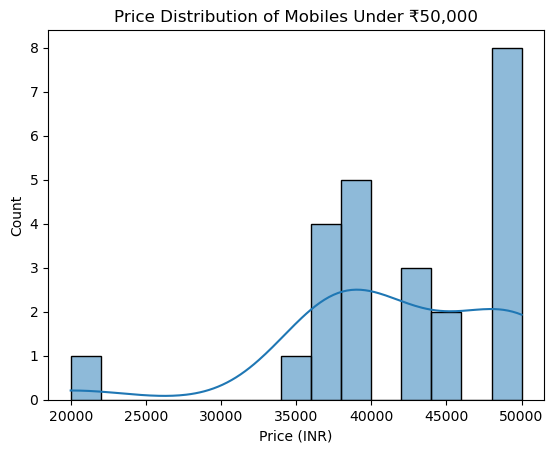

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#PRICE DISTRIBUTION
sns.histplot(df["PRICES"], kde=True, bins=15)
plt.title("Price Distribution of Mobiles Under ₹50,000")
plt.xlabel("Price (INR)")
plt.ylabel("Count")
plt.show()


In [5]:
#LIST OF TOP 10 MOST EXPENSIVE PHONES
df.sort_values(by="PRICES", ascending=False).head(10)

,PRODUCTS,PRICES,DESCRIPTION,REVIEW
2,"Apple iPhone 14 (Starlight, 128 GB)",49999,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.6
4,"MOTOROLA Razr 60 (PANTONE Lightest Sky, 256 GB)",49999,8 GB RAM | 256 GB ROM17.53 cm (6.9 inch) Full ...,4.6
6,"MOTOROLA Razr 60 (PANTONE Spring Bud, 256 GB)",49999,8 GB RAM | 256 GB ROM17.53 cm (6.9 inch) Full ...,4.6
14,"MOTOROLA Razr 60 (PANTONE Gibraltar Sea, 256 GB)",49999,8 GB RAM | 256 GB ROM17.53 cm (6.9 inch) Full ...,4.6
1,"IQOO 12 5G (Alpha, 256 GB)",49999,12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Dis...,4.6
7,"vivo V40 Pro 5G (Titanium Grey, 512 GB)",49998,12 GB RAM | 512 GB ROM17.22 cm (6.78 inch) Ful...,4.5
9,"vivo V40 Pro 5G (Ganges Blue, 512 GB)",49349,12 GB RAM | 512 GB ROM17.22 cm (6.78 inch) Ful...,4.5
11,"IQOO 12 5G (Legend, 256 GB)",48899,12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Dis...,4.6
15,"Apple iPhone 13 (Midnight, 128 GB)",44999,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.6
5,"Motorola Edge 50 Ultra 5G (Nordic Wood, 512 GB)",44999,12 GB RAM | 512 GB ROM17.02 cm (6.7 inch) Disp...,4.3


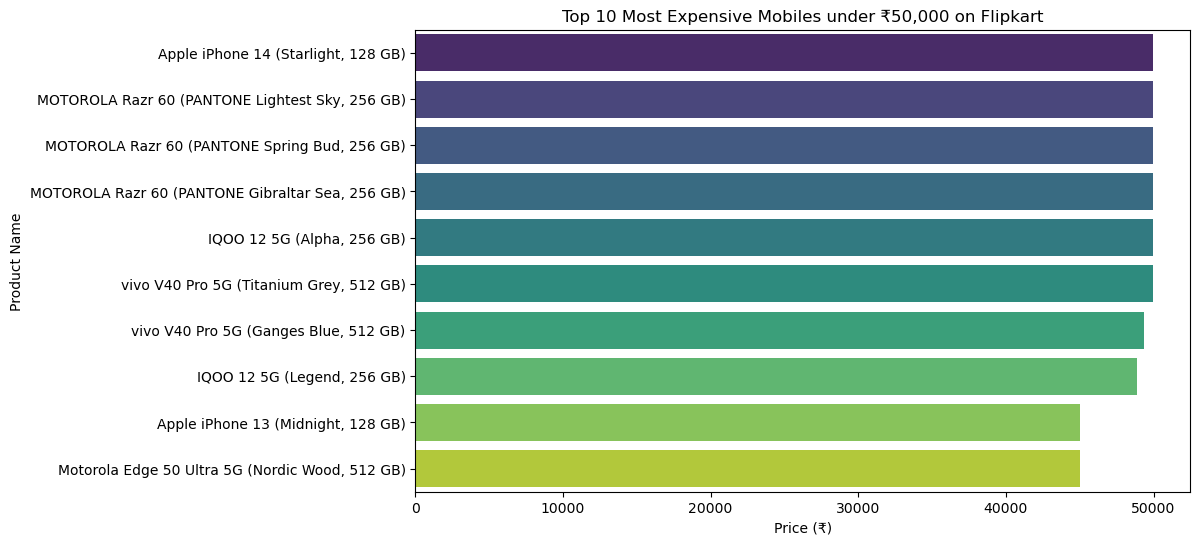

In [12]:
#DATA VISUALIZING TOP 10 MOST EXPENSIVE PHONES
top10 = df.sort_values(by="PRICES", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="PRICES", y="PRODUCTS", data=top10, palette="viridis",hue="PRODUCTS")
plt.title("Top 10 Most Expensive Mobiles under ₹50,000 on Flipkart")
plt.xlabel("Price (₹)")
plt.ylabel("Product Name")
plt.show()

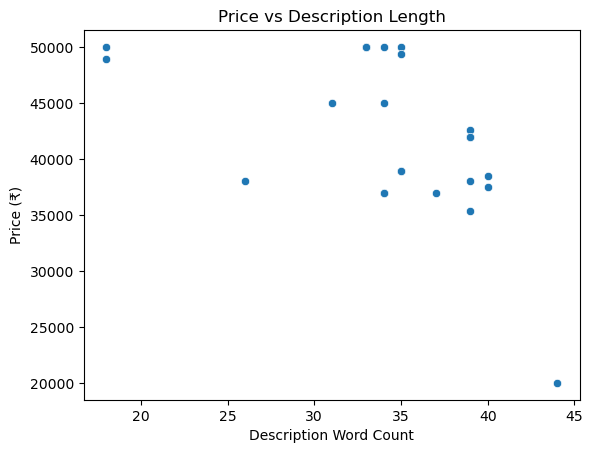

In [14]:
#DATA VISUALISING OF DESCENDING WORD COUNT
df["Desc_Word_Count"] = df["DESCRIPTION"].apply(lambda x: len(x.split()))
sns.scatterplot(data=df, x="Desc_Word_Count", y="PRICES")
plt.title("Price vs Description Length")
plt.xlabel("Description Word Count")
plt.ylabel("Price (₹)")
plt.show()

In [15]:
#LIST OF TOP REVIEWED PRODUCTS
df["Review_Length"] = df["REVIEW"].apply(lambda x: len(x.split()))
top_reviews = df.sort_values(by="Review_Length", ascending=False).head(10)
top_reviews[["PRODUCTS", "REVIEW"]]

,PRODUCTS,REVIEW
0,"OnePlus 13R 5G (Nebula Noir, 256 GB)",4.5
1,"IQOO 12 5G (Alpha, 256 GB)",4.6
22,"Honor 200 Pro 5G (Black, 512 GB)",3.9
21,"IQOO Neo 10 (Titanium Chrome, 256 GB)",4.5
20,"vivo V50 5G (Titanium Grey, 256 GB)",4.5
19,"Google Pixel 8a (Obsidian, 128 GB)",4.3
18,"vivo T4 Ultra 5G (Phoenix Gold, 512 GB)",4.5
17,"OnePlus 13R 5g (Astral Trail, 256 GB)",4.5
16,"Samsung Galaxy A36 5G (Awesome Black, 256 GB)",4.3
15,"Apple iPhone 13 (Midnight, 128 GB)",4.6


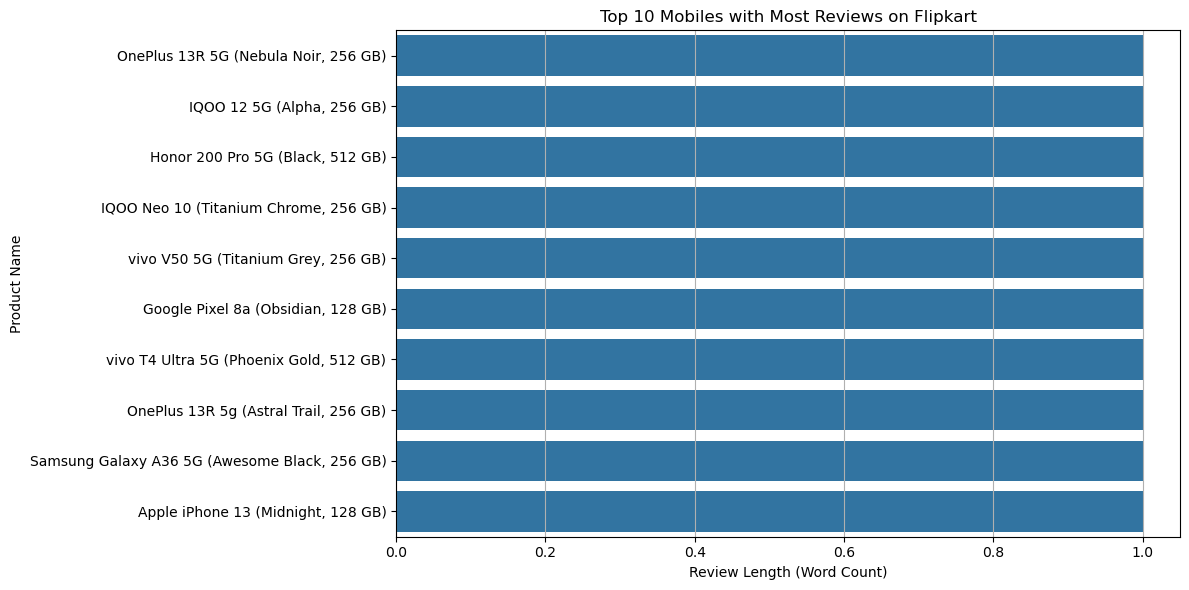

In [32]:
#DATA VISUALISATION OF TOP 10 MOBILES WITH MOST REVIEWS ON FLIPKART
plt.figure(figsize=(12, 6))
sns.barplot(
    y="PRODUCTS", 
    x="Review_Length", 
    data=top_reviews)
plt.title("Top 10 Mobiles with Most Reviews on Flipkart")
plt.xlabel("Review Length (Word Count)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.grid(axis='x')
plt.show()


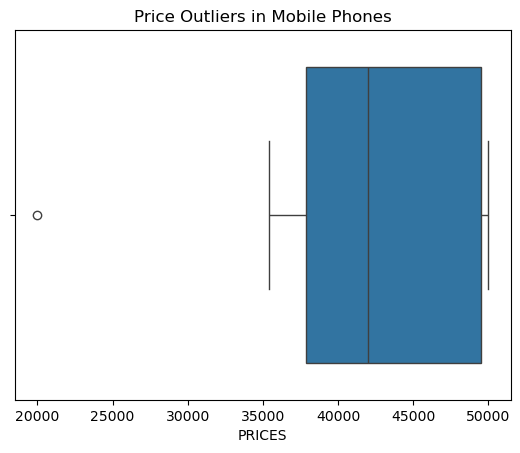

In [30]:
#BOXPLOT DATA VISUALISATION OF OUTLIERS IN PRICE
sns.boxplot(x=df["PRICES"])
plt.title("Price Outliers in Mobile Phones")
plt.show()

In [34]:
#PRICE RANGE
print("Min Price:", df["PRICES"].min())
print("Max Price:", df["PRICES"].max())
print("Mean Price:", df["PRICES"].mean())
print("Median Price:", df["PRICES"].median())

Min Price: 19999
Max Price: 49999
Mean Price: 42123.083333333336
Median Price: 41999.0


In [40]:
#PRODUCT WITH LOWEST AND HIGHEST PRICE AND NO. OF REVIEWS
lowest_price = df.sort_values(by="PRICES", ascending=True).head(1)
print("Lowest Priced Product:")
print(lowest_price[["PRODUCTS", "PRICES", "REVIEW"]])
highest_price = df.sort_values(by="PRICES", ascending=False).head(1)
print("\nHighest Priced Product:")
print(highest_price[["PRODUCTS", "PRICES", "REVIEW"]])


Lowest Priced Product:
                                PRODUCTS  PRICES REVIEW
3  OPPO Reno 12 5G (Matte Brown, 256 GB)   19999    4.4

Highest Priced Product:
                              PRODUCTS  PRICES REVIEW
2  Apple iPhone 14 (Starlight, 128 GB)   49999    4.6
